TD - TP 1 ENTRAINEMENT D'UN MODELE

----COMPTE RENDU JOSEPH MBODE ------

Exercice 1 : Construction du jeu d'entrainement et de test

In [1]:
# 1- données de fleurs d'iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [2]:
# 2- Nombre d'exemple dans ce jeu
print("Nombre d'exmples est de :",X.shape)

Nombre d'exmples est de : (150, 4)


# 3- Label de cette base
d'après la taille des données, on obeserve 150 labels

# 4- Classe identifiées de cette base
d'après la taille des données, on obeserve 4 classes

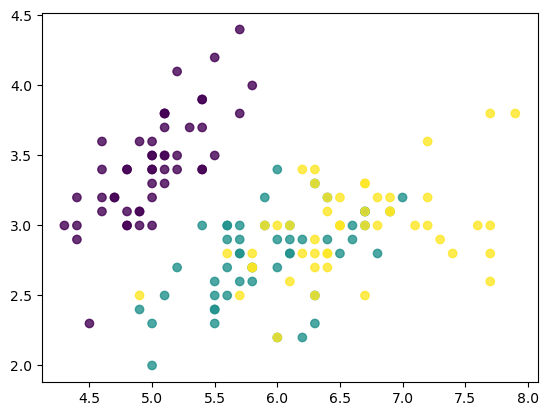

In [3]:
# 5- Nuage de points
plt.scatter(X[:,0],X[:,1],c=y,alpha=0.8)

Graphiquement on observe 3 classes

In [4]:
# 6 -Divisions du jeu de données
from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = t)

In [5]:
#   a) pour t = 0.5, affichage des dimensions
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.5)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)


Train set: (75, 4)
Test set: (75, 4)


In [6]:
#   b)pour t = 0.2, affichage des dimensions
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.2)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (120, 4)
Test set: (30, 4)


#   c)Utilité du paramètre  t
il sert à séparer les données en pourcentage '1-t' d'entrainenment et 't' de test

In [7]:
#7-pour 80% d'entrainement
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

Text(0.5, 1.0, 'Test set')

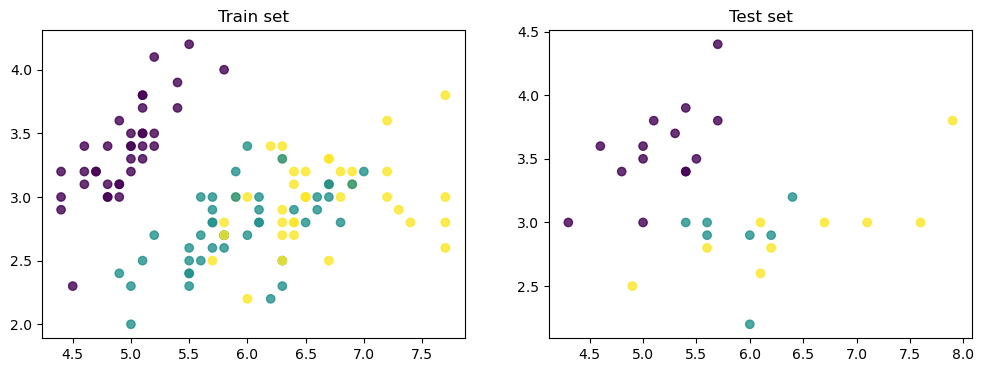

In [8]:
#   a) nuage de point
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train, alpha =0.8)
plt.title('Train set')

plt.subplot(1,2,2)
plt.scatter(X_test[:,0],X_test[:,1], c=y_test, alpha=0.8)
plt.title('Test set')


#b) relancer a) commenter
On a une séparation des classes légèrement différente et une densité de points différentes,
mais avec une dispersion similaire et unique malgré les relances

In [9]:
# 8- reconstruction du jeu d'entrainement et de test avec le paramètre random
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.2,random_state=5)

Text(0.5, 1.0, 'Test set')

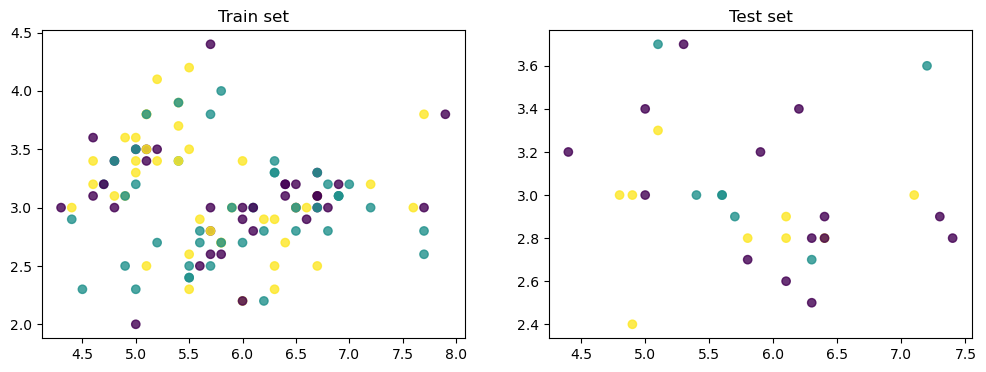

In [10]:
#   a) visualisation des nuages de points
#X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.2,random_state=5)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(X_train[:,0],X_train[:,1], c=y_train, alpha = 0.8)
plt.title('Train set')

plt.subplot(1,2,2)
plt.scatter(X_test[:,0],X_test[:,1], c=y_test, alpha = 0.8)
plt.title('Test set')

In [11]:
#   b) rôle du paramètre random_state

#on assure la même répartition à chaque fois qu'on executera le code

-------------------------------------------------------------------------

Exercice 2 : Entrainement et évaluation

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
#1- modèle en fixant le nombre de voisin à 1 
model = KNeighborsClassifier(1)

In [14]:
#2- Entrainement  des données avec la méthode fit
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
#3- Evaluation du model (model.score)
#   a) sur les données train
m_s=model.score(X_train,y_train)
print(f'Données entrainée: le modèle a {m_s*100}% de probabilité de véracité'.format(m_s))

#   b) sur les données non vues par le modèle
m_n_s = model.score(X_test,y_test)
print(f'Données non entrainées: le modèle a {m_n_s*100}% de probabilité de véracité'.format(m_n_s))

Données entrainée: le modèle a 100.0% de probabilité de véracité
Données non entrainées: le modèle a 30.0% de probabilité de véracité


---------------------------------------------------------------------

Exercice 3 :Amélioration de l'entrainement et évaluation du modèle 

1 - Comparaison entre 3 & 4 voisins

In [16]:
model3 = KNeighborsClassifier(3)
model4 = KNeighborsClassifier(4)


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.2,random_state=15)

In [18]:
print('entrainement sur les données de l Iris') 
model3.fit(X_train,Y_train)
m3_s = model3.score(X_train,Y_train)
print('score du model3 {}'.format(m3_s))

model4.fit(X_train,Y_train)
m4_s = model4.score(X_train,Y_train)
print('score du model4 {}'.format(m4_s))


entrainement sur les données de l Iris
score du model3 0.95
score du model4 0.95


2- evaleuation finale :
l'évaluation finale sera faite sur le score 4, 

2-

3- modification du jeu et nouvelle performance : 

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.3,random_state=40)

In [20]:
model3.fit(X_train,Y_train)
m3_s = model3.score(X_train,Y_train)
print('score du model3 {}'.format(m3_s))

model4.fit(X_train,Y_train)
m4_s = model4.score(X_train,Y_train)
print('score du model4 {}'.format(m4_s))

score du model3 0.9523809523809523
score du model4 0.9428571428571428


____________________________________________________________________________________________________________

Exercice 4 : Optimisation du modèle de recherche

In [21]:
from sklearn.model_selection import GridSearchCV

1-définitions hyperparamètres

In [22]:
param_grid = {'n_neighbors':np.arange(1,50), 'metric':['euclidian','manhattan']}

2-Grille d'estimateurs

In [23]:
Grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

3- Construction du modèle

In [24]:
Grid.fit(X_train,Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
245 fits failed out of a total of 490.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
245 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 213, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidian', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

4- Meilleurs paramètres et scores

In [25]:
Grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 11}

In [26]:
Grid.best_score_

0.9523809523809523

5- sauvegarde du modèle

In [27]:
model = Grid.best_estimator_

6- evaluation des performances sur le jeu test:

In [28]:
model.score(X_test,Y_test)

0.9777777777777777

7- Performance grace à la matrice de confusionµ

In [29]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, model.predict(X_test))

array([[16,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 14]], dtype=int64)

Interpretation :
le modèle semble performant avec 44 prédictions correctes sur les 45 testées, 
sauf 1 seule instance de classe de 2 identifiées comme classe 1

_______________________________________________________________________________________________________________

Exercice 5 :  Interpretation des courbe par apprentissage

In [30]:
from sklearn.model_selection import learning_curve


 1- representation de N: N représente la proportion , ou le nombre de données d'entrainement utilisées pour la courbe d'apprentisage

In [31]:
pourcentage_debut = 0.1
pourcentage_fin = 1.0
nombre_de_lots = 10

In [32]:
N, train_score, val_score = learning_curve(model, X_train, Y_train, train_sizes = np.linspace(pourcentage_debut, pourcentage_fin, nombre_de_lots), cv = 5)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X

2- Scores moyens des données de validation

Text(0.5, 0, 'train sizes')

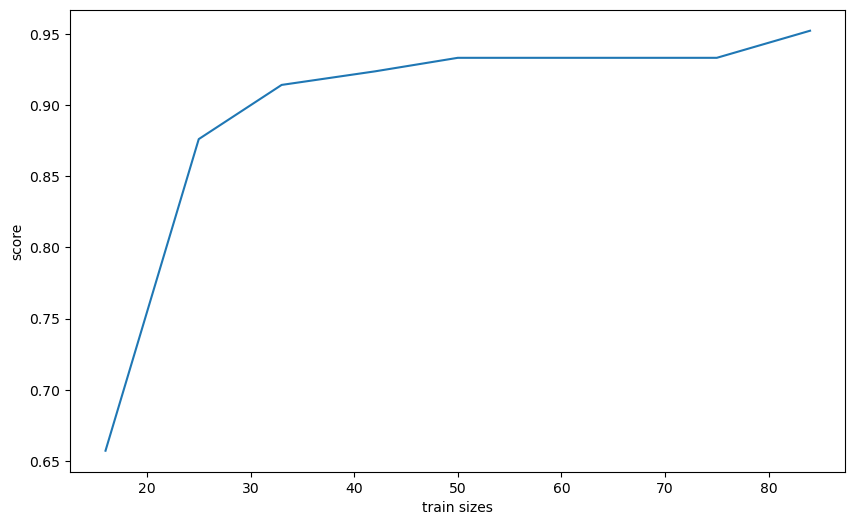

In [33]:
plt.figure(figsize=(10,6))
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.ylabel('score')
plt.xlabel('train sizes')

3- Affichage des scores de validation et d'entrainement

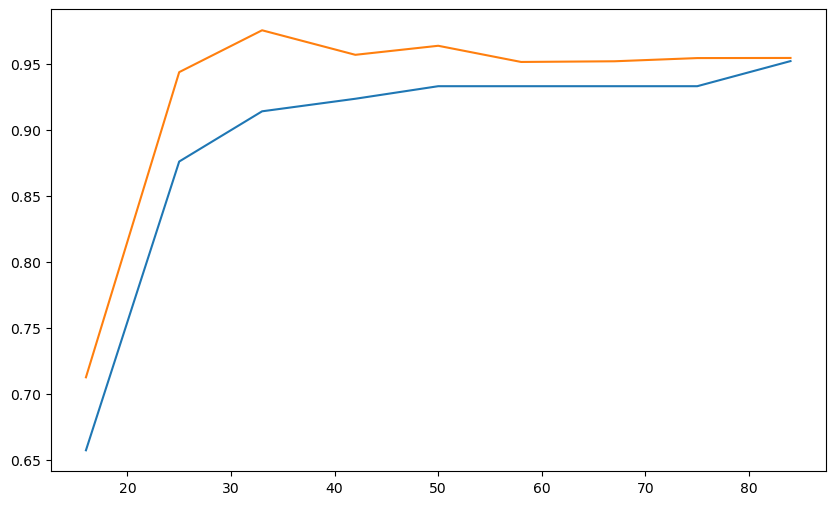

In [34]:
plt.figure(figsize=(10,6))
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.plot(N,train_score.mean(axis=1),label='entrainement')



4- Interpretation : 

Vu que la validation converge à peu près en 95 avec les données d'entrainement vues par le modèle, on peut dire que celui-ci n'a pas besoin de rajouter plus de données